In [1]:
# pacote de processamento dos dados
import pandas as pd
import numpy as np

# pacote de visualização de dados
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
arquivo2 = 'https://github.com/devGuus/Unisantos/raw/main/tde/Dados/processamento-petroleo-m3-1990-2023.xls'

# leitura do arquivo

df = pd.read_excel(arquivo2)

# imprime as 5 primeiras linhas

df.head(5)


,ANO,MÊS,UNIDADE DA FEDERAÇÃO,REFINARIA,MATÉRIA PRIMA,PROCESSADO
0,1990,DEZ,BAHIA,DAX OIL,PETRÓLEO IMPORTADO,0
1,1990,NOV,BAHIA,DAX OIL,PETRÓLEO IMPORTADO,0
2,1990,FEV,SÃO PAULO,RPBC,OUTRAS CARGAS,3026
3,1990,JAN,SÃO PAULO,RPBC,OUTRAS CARGAS,2678
4,1990,OUT,BAHIA,DAX OIL,PETRÓLEO IMPORTADO,0


In [3]:
# imprime as 5 útilmas linhas 

df.tail(5)

,ANO,MÊS,UNIDADE DA FEDERAÇÃO,REFINARIA,MATÉRIA PRIMA,PROCESSADO
21149,2023,MAR,SÃO PAULO,RPBC,PETRÓLEO IMPORTADO,31793
21150,2023,FEV,SÃO PAULO,SSOIL,PETRÓLEO NACIONAL,0
21151,2023,JAN,SÃO PAULO,SSOIL,PETRÓLEO NACIONAL,0
21152,2023,FEV,SÃO PAULO,RPBC,PETRÓLEO IMPORTADO,5195
21153,2023,JAN,SÃO PAULO,RPBC,PETRÓLEO IMPORTADO,12556


In [4]:
# mostra a quantidade de valores nulos no dataset

print(df.isnull().sum())


ANO                     0
MÊS                     0
UNIDADE DA FEDERAÇÃO    0
REFINARIA               0
MATÉRIA PRIMA           0
PROCESSADO              0
dtype: int64


In [5]:
# conta quantas linhas da coluna 'PRODUÇÃO' contém o valor 0.

(df['PROCESSADO'] == 0).sum()


7456

In [6]:
# Imprime as informações gerais do arquivo:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21154 entries, 0 to 21153
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ANO                   21154 non-null  int64 
 1   MÊS                   21154 non-null  object
 2   UNIDADE DA FEDERAÇÃO  21154 non-null  object
 3   REFINARIA             21154 non-null  object
 4   MATÉRIA PRIMA         21154 non-null  object
 5   PROCESSADO            21154 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 991.7+ KB


In [7]:
# resumo estatistico da coluna 'PRODUÇÃO'

df['PROCESSADO'].describe()


count    2.115400e+04
mean     1.506859e+05
std      2.898058e+05
min      0.000000e+00
25%      0.000000e+00
50%      8.877500e+03
75%      1.468678e+05
max      1.918414e+06
Name: PROCESSADO, dtype: float64

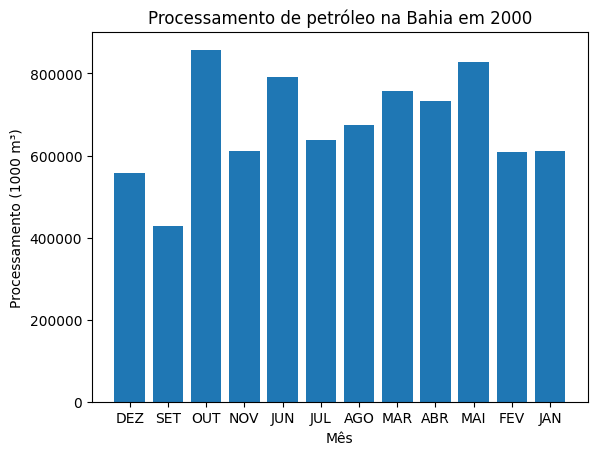

In [8]:
# Filtra os dados pela Bahia e pelo ano de 2000
df_bahia_2000 = df[(df['UNIDADE DA FEDERAÇÃO'] == 'BAHIA') & (df['ANO'] == 2000)]

# Plota o gráfico de barras
plt.bar(df_bahia_2000['MÊS'], df_bahia_2000['PROCESSADO'])
plt.xlabel('Mês')
plt.ylabel('Processamento (1000 m³)')
plt.title('Processamento de petróleo na Bahia em 2000')
plt.show()

O ano mais produtivo foi 2014 e o ano menos produtivo foi 1991.


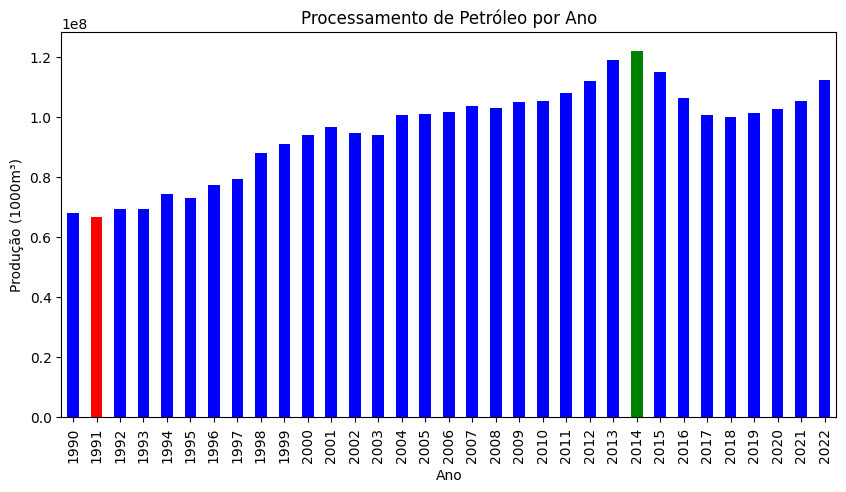

In [9]:
# remove o ano 2023
df_filtered = df[df['ANO'] < 2023]

# agrupa os dados por ano e soma os processos
producao_por_ano = df_filtered.groupby('ANO')['PROCESSADO'].sum()

# ordena o resultado do agrupamento pela coluna de produção em ordem decrescente e pega o primeiro valor, correspondente ao ano com maior produção.
ano_mais_produtivo = producao_por_ano.sort_values(ascending=False).index[0]

# ordena o resultado do agrupamento pela coluna de produção em ordem decrescente e pega o primeiro valor, correspondente ao ano com maior produção.
ano_menos_produtivo = producao_por_ano.sort_values(ascending=True).index[0]

print(f"O ano mais produtivo foi {ano_mais_produtivo} e o ano menos produtivo foi {ano_menos_produtivo}.")

# encontra o índice da maior e menor produção
idx_maior = producao_por_ano.argmax()
idx_menor = producao_por_ano.argmin()

# define as cores das barras
cores = ['r' if i == idx_menor else 'g' if i == idx_maior else 'b' for i in range(len(producao_por_ano))]

# plota o gráfico de barras
producao_por_ano.plot(kind='bar', color=cores, figsize=(10,5))

# define os títulos do gráfico e dos eixos
plt.title('Processamento de Petróleo por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção (1000m³)')

# exibe o gráfico
plt.show()
